# Electronics Store Analysis 

## In this project we are going to analyse the data of an electronics store in 2019. We will start with exploring the data then clean it, afterward we will aski some intersting questions and answer them.

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Merge multiple files into one file

In [73]:
sales_april = pd.read_csv('./Sales_Data/Sales_April_2019.csv')


files = [file for file in os.listdir('./Sales_Data')]

    
Sales_file = pd.DataFrame()
    
for file in files:
    month_sale_file = pd.read_csv('./Sales_Data/'+file) 
    Sales_file = pd.concat([Sales_file, month_sale_file])
    
Sales_file.head()

Sales_file.to_csv('Sales_file.csv')

sales_file = pd.read_csv('Sales_file.csv')


In [74]:

cols = list(sales_file.columns)


sales_file = sales_file.drop(columns = cols[0])
sales_file



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean up the data!

Drop rows of NaN + any other undesired data

In [79]:

############################################################ here we deleted all null cells
null = sales_file

null1 = sales_file[sales_file.isna().any(axis=1)]
null1

null = null.dropna(how='any')
null
null = null.reset_index(drop = True)
null

############################################################# here we deleted the cells with 'Or'   
Or = null
Or = null[null['Order Date'].str[0:2] == 'Or']
Or

NoOr = null[null['Order Date'].str[0:2] != 'Or']
NoOr = NoOr.reset_index(drop = True)
NoOr
#############################################################

sales_file = NoOr
sales_file

####################################################

sales_file['Quantity Ordered'] = sales_file['Quantity Ordered'].astype('float64')
sales_file['Price Each'] = sales_file['Price Each'].astype('float64')
sales_file['Price Each'] = sales_file['Price Each'].astype('float64')
sales_file




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Data Analysis and Visualization


### Questions to answers:
    1- What was the best month for sales? How much was earned that month?
    2- What city has the highiest number of sales?
    3- What time should we display advertisements to maximize likelihood of customer's buying product?
    4- What products sold the most? 
    5- What products are often sold together? (COULD NOT FIND IT HELP!!)

### What was the best month for sales? How much was earned that month?

In [83]:

sales_file['Month'] = sales_file['Order Date'].str[0:2]

cols = list(sales_file.columns.values)


sales_file = sales_file[cols[0:5] + [cols[-1]] + cols[5:]] ### placing the month column
sales_file = sales_file.loc[:,~sales_file.columns.duplicated()] ### when we place we might have duplicates so this helps in removing duplicates
sales_file.head()

sales_file['Month'] = sales_file['Month'].astype('int') #### here we are changing the data type
sales_file = sales_file.loc[:,~sales_file.columns.duplicated()]
sales_file




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1.0,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1.0,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016"


find the sales we must have a new column (quant. * price each)

In [100]:
sales_file['Sales'] = sales_file['Quantity Ordered'] * sales_file['Price Each']

cols = list(sales_file.columns.values)
sales_file = sales_file[cols[0:4] + [cols[-1]] + cols[4:]]
sales_file = sales_file.loc[:,~sales_file.columns.duplicated()]
sales_file

sales_file.groupby('Month').sum().sort_values('Sales', ascending = False)


,Quantity Ordered,Price Each,Sales
Month,,,
12,28114.0,4.588415e+06,4.613443e+06
10,22703.0,3.715555e+06,3.736727e+06
4,20558.0,3.367671e+06,3.390670e+06
11,19798.0,3.180601e+06,3.199603e+06
5,18667.0,3.135125e+06,3.152607e+06
3,17005.0,2.791208e+06,2.807100e+06
7,16072.0,2.632540e+06,2.647776e+06
6,15253.0,2.562026e+06,2.577802e+06
8,13448.0,2.230345e+06,2.244468e+06


Visualization

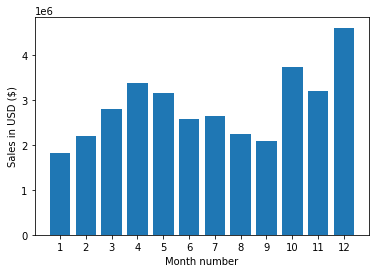

In [101]:
results = sales_file.groupby('Month').sum()
import matplotlib.pyplot as plt

months = range(1,13)


plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



### What city has the highiest number of sales?

Task1: create a city column

In [103]:

sales_file['City'] = sales_file['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])
sales_file
############### Two ways ###################################


# columnTest2 = sales_file['Purchase Address'].apply(lambda x: x.split(',')[1] + ' '+ x.split(',')[2][0:3]) ### inspired by his work!

# columnTest = [i.split(',') for i in sales_file['Purchase Address']]
# columnTest1 = [i[1] + i[2][0:3] for i in columnTest]

# test['City'] = columnTest1


,Order ID,Product,Quantity Ordered,Price Each,Month,Purchase Address,Sales,Order Date,City
0,176558,USB-C Charging Cable,2.0,11.95,4,"917 1st St, Dallas, TX 75001",23.90,04/19/19 08:46,Dallas TX
1,176559,Bose SoundSport Headphones,1.0,99.99,4,"682 Chestnut St, Boston, MA 02215",99.99,04/07/19 22:30,Boston MA
2,176560,Google Phone,1.0,600.00,4,"669 Spruce St, Los Angeles, CA 90001",600.00,04/12/19 14:38,Los Angeles CA
3,176560,Wired Headphones,1.0,11.99,4,"669 Spruce St, Los Angeles, CA 90001",11.99,04/12/19 14:38,Los Angeles CA
4,176561,Wired Headphones,1.0,11.99,4,"333 8th St, Los Angeles, CA 90001",11.99,04/30/19 09:27,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3.0,2.99,9,"840 Highland St, Los Angeles, CA 90001",8.97,09/17/19 20:56,Los Angeles CA
185946,259354,iPhone,1.0,700.00,9,"216 Dogwood St, San Francisco, CA 94016",700.00,09/01/19 16:00,San Francisco CA
185947,259355,iPhone,1.0,700.00,9,"220 12th St, San Francisco, CA 94016",700.00,09/23/19 07:39,San Francisco CA
185948,259356,34in Ultrawide Monitor,1.0,379.99,9,"511 Forest St, San Francisco, CA 94016",379.99,09/19/19 17:30,San Francisco CA


find which city is the highiest

In [107]:
sales_file.groupby('City').sum().sort_values(by = 'Sales', ascending = False)




,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,50239.0,8.211462e+06,315520,8.262204e+06
Los Angeles CA,33289.0,5.421435e+06,208325,5.452571e+06
New York City NY,27932.0,4.635371e+06,175741,4.664317e+06
Boston MA,22528.0,3.637410e+06,141112,3.661642e+06
Atlanta GA,16602.0,2.779908e+06,104794,2.795499e+06
Dallas TX,16730.0,2.752628e+06,104620,2.767975e+06
Seattle WA,16553.0,2.733296e+06,104941,2.747755e+06
Portland OR,11303.0,1.860558e+06,70621,1.870732e+06
Austin TX,11153.0,1.809874e+06,69829,1.819582e+06


Visualize

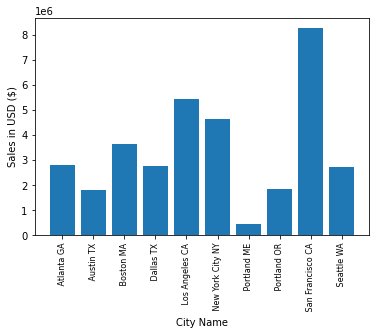

In [108]:
cities = [city for city,df in sales_file.groupby('City')] #### I still do not understand how he rearrange it
results = sales_file.groupby('City').sum()

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()


### What time should we display advertisements to maximize likelihood of customer's buying product?

 To do so, we have to create a column that represents the hour. Then we can count the number of orders corresponds to each hour.

In [109]:
sales_file['Order Date'] = pd.to_datetime(sales_file['Order Date'])
sales_file['Hour'] = sales_file['Order Date'].dt.hour
sales_file.head()


,Order ID,Product,Quantity Ordered,Price Each,Month,Purchase Address,Sales,Order Date,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,4,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,Dallas TX,8
1,176559,Bose SoundSport Headphones,1.0,99.99,4,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,Boston MA,22
2,176560,Google Phone,1.0,600.00,4,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,Los Angeles CA,14
3,176560,Wired Headphones,1.0,11.99,4,"669 Spruce St, Los Angeles, CA 90001",11.99,2019-04-12 14:38:00,Los Angeles CA,14
4,176561,Wired Headphones,1.0,11.99,4,"333 8th St, Los Angeles, CA 90001",11.99,2019-04-30 09:27:00,Los Angeles CA,9


Visualize

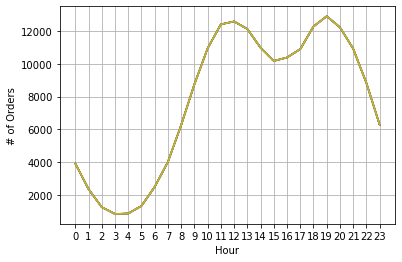

In [110]:
hour = [hour for hour,df in sales_file.groupby('Hour')]
results = sales_file.groupby(sales_file['Hour']).count()



plt.plot(hour, results)
plt.xticks(hour)
plt.ylabel('# of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()



## What products are often sold together?

In [135]:
## I could not solve it!

## I was thinking of grouping the 'ID Order' since if each order have its own serial number and each product recorded will have that serial number.
## but I could not implement it 

## What products sold the most? Why do you think it sold the most?

In [113]:
sales_file.groupby('Product').sum().sort_values(by='Quantity Ordered', ascending = False)



,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
AAA Batteries (4-pack),31017.0,61716.59,146370,92740.83,297332
AA Batteries (4-pack),27635.0,79015.68,145558,106118.40,298342
USB-C Charging Cable,23975.0,261740.85,154819,286501.25,314645
Lightning Charging Cable,23217.0,323787.10,153092,347094.15,312529
Wired Headphones,20557.0,226395.18,133397,246478.43,271720
Apple Airpods Headphones,15661.0,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457.0,1332366.75,94113,1345565.43,192445
27in FHD Monitor,7550.0,1125974.93,52558,1132424.50,107540
iPhone,6849.0,4789400.00,47941,4794300.00,98657


### Visualize 

Text(0, 0.5, 'Quantity')

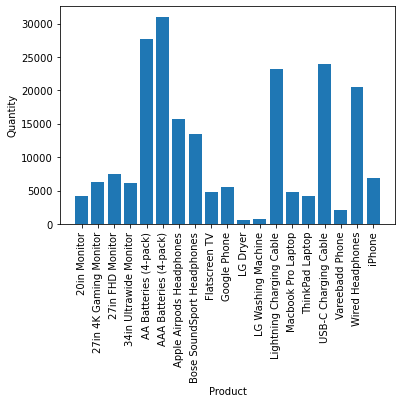

In [114]:
quantity_ordered = sales_file.groupby('Product')['Quantity Ordered'].sum()

product_names = [name for name,df in sales_file.groupby('Product')]

plt.bar(product_names, quantity_ordered)
plt.xticks(product_names, rotation = 'vertical')
plt.xlabel('Product')
plt.ylabel('Quantity')

In [118]:
product_price = sales_file.groupby('Product').mean()['Price Each']
product_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

### Overlapping two charts

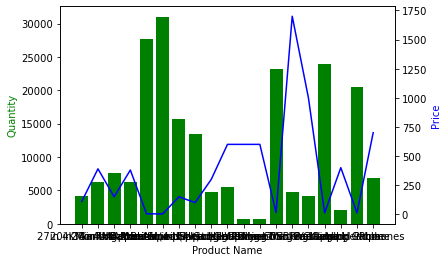

In [119]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_names, quantity_ordered, color='g')
ax2.plot(product_names, product_price, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Price', color='b')

plt.show()

Text(0, 0.5, 'Quantity')

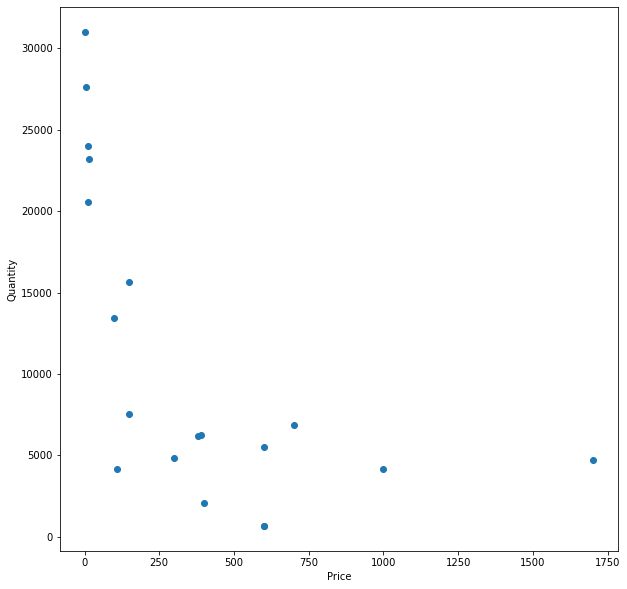

In [136]:
plt.figure(figsize=(10,10))
plt.scatter(product_price, quantity_ordered)
plt.xlabel('Price')
plt.ylabel('Quantity')

# Data Analysis and Visualization


### Questions to answers:
    1- What was the best month for sales? How much was earned that month?
    2- What city has the highiest number of sales?
    3- At what time most orders are made?
    4- What products sold the most? 
    5- What products are often sold together? (COULD NOT FIND IT HELP!!)

# Conclusions:

## Insights:
    1- December have the best number of sales, and I think it is due to Christmas.
    2- San Francisco CA	has the highest sales. It has one of the highest averge household income in the USA.
    3- Most of orders are made between 11AM - 12pM and 6PM - 8PM.
    4- AAA Batteries (4-pack) is the most sold product. The price plays a major factor.
